# Introducción a la regresión  polinómica

¿Qué es la regresión polinomial?
La regresión polinomial, o regresión polinómica, es un modelo de regresión en el cual la relación entre la variable independiente X y la variable dependiente Y se modela mediante un polinomio.

 La regresión polinómica es un tipo de regresión lineal en la que la relación entre la variable de entrada (x) y la variable de salida (y) se expresa como un polinomio. En términos más simples, es como ajustar una línea curva en lugar de una línea recta a los puntos de datos. Esta curva representa cómo cambia y a medida que x se eleva a diferentes potencias, como x, x², x³, etc. Este enfoque es especialmente útil cuando los datos muestran un patrón que no es una línea recta, lo que indica que la relación entre x e y es más compleja que simplemente aumentar o disminuir a una velocidad constante.




### Modelo Matemático

La regresión polinómica ofrece varias ventajas, como la capacidad de modelar relaciones no lineales y la flexibilidad para ajustar el modelo a diferentes grados de complejidad. Sin embargo, también presenta desventajas, como el riesgo de sobreajuste, que puede ocasionar un bajo rendimiento en predicciones. Para mitigar este problema, se pueden utilizar técnicas como la validación cruzada y la regularización. La regresión polinómica tiene aplicaciones en diversos campos, incluyendo finanzas, física e ingeniería, donde se utiliza para modelar relaciones complejas entre variables.



La ecuación general del modelo puede expresarse como:

$$y = B_0 + B_1x + B_2x^2 + \dots + B_nx^n + \varepsilon $$

Donde:

- \( y \) es la **variable dependiente**.  
- \( x \) es la **variable independiente**.  
- \(  B0 + B1x + B2x^2) son los **coeficientes del modelo**.  
- \\( \varepsilon \\) representa el **término de error**.

 ### Implementación de la regresión polinómica

Esta sección importa las librerías principales necesarias para el análisis de datos, la visualización y el preprocesamiento.

import pandas as pd pandas es una librería para el manejo y análisis de datos en Python.

Permite trabajar con estructuras como DataFrames y Series, ideales para tablas de datos (similares a hojas de cálculo).

El alias pd es una abreviación estándar para usarla más fácilmente en el código.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Importaciones

matplotlib.pyplot: para graficar.

GridSearchCV: permite probar múltiples configuraciones y elegir la mejor.

Pipeline: encadena pasos (preprocesamiento + modelo) en un solo flujo.

mean_squared_error, r2_score: métricas para evaluar el rendimiento del modelo.

train_test_split: separa los datos en entrenamiento y prueba.

LinearRegression: modelo lineal base.

PolynomialFeatures: genera características polinómicas (elevadas a potencias).

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X contiene los valores de entrada (0 a 39).

y son los valores reales que crecen de forma no lineal.

Crea un gráfico de dispersión para observar la relación entre X y y.
Esto permite ver que no es una línea recta, por lo que un modelo lineal simple no sería suficiente.

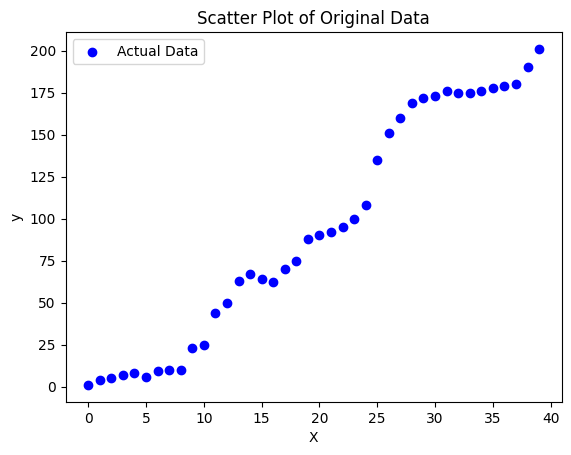

In [5]:

X = np.arange(0, 40)
y = [1, 4, 5, 7, 8, 6, 9, 10, 10, 23, 25, 44, 50, 63, 67, 64, 62, 70, 75, 88, 90, 92, 95, 100, 108, 135, 151, 160, 169, 172,173,176,175,175,176,178,179,180,190,201]
# First, let's plot the original data to see the relationship between X and y


plt.scatter(X, y, color='blue', label='Actual Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.show()

Divide los datos:

80 % para entrenamiento (X_train, y_train)

20 % para prueba (X_test, y_test)

random_state=42 asegura que la división sea reproducible.

In [6]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

El Pipeline encadena dos pasos:

PolynomialFeatures(): genera nuevas columnas con potencias de X (por ejemplo: X², X³...).

LinearRegression(): ajusta el modelo lineal a esas variables.

De esta forma, el modelo aprende curvas sin tener que programar cada paso manualmente.

In [7]:
# Setting up a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

Indica que se probarán grados del 1 al 4 para el polinomio.

Grado 1 → línea recta

Grado 2 → parábola

Grado 3, 4 → curvas más complejas

In [8]:
# Parameters for grid search

parameters = {'poly__degree': np.arange(1, 5)}

cv=4: usa validación cruzada con 4 particiones.

scoring='neg_mean_squared_error': mide el error cuadrático medio (menor es mejor).

fit(...): entrena el modelo con todas las combinaciones posibles de grados.

In [9]:
grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1,1), y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': array([1, 2, 3, 4])},
             scoring='neg_mean_squared_error')

Obtiene el grado del polinomio que mejor ajusta los datos de entrenamiento.

In [10]:
best_degree = grid_search.best_params_['poly__degree']
poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1,1))
X_poly_test_best = poly_best.transform(X_test.reshape(-1,1))

model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)

LinearRegression()

Se generan las variables polinómicas según el mejor grado.

Se entrena el modelo final usando esos datos transformados.

Calcula las predicciones del modelo tanto para entrenamiento como para prueba.

In [11]:
# Making predictions with the best model
predictions_train = model_best.predict(X_poly_train_best)
predictions_test = model_best.predict(X_poly_test_best)

mean_squared_error: mide el error medio entre valores reales y predichos.

r2_score: mide qué tan bien el modelo explica la variabilidad de los datos (1 = perfecto).

In [12]:
# Evaluating the model
train_error = mean_squared_error(y_train, predictions_train)
test_error = mean_squared_error(y_test, predictions_test)
train_accuracy = r2_score(y_train, predictions_train)
test_accuracy = r2_score(y_test, predictions_test)

Devuelve una tupla con:

Mejor grado del polinomio

Error de entrenamiento

Error de prueba

Precisión R² del entrenamiento

Precisión R² de prueba

In [13]:


best_degree, train_error, test_error, train_accuracy, test_accuracy

(np.int64(3),
 82.12057919191898,
 93.19555930834686,
 0.9833308707514882,
 0.9716276725394738)

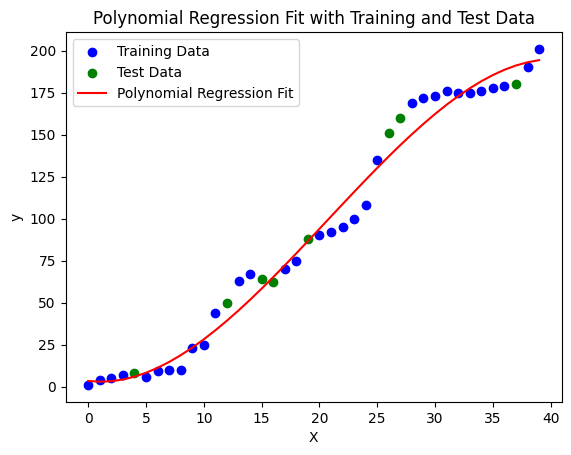

In [3]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

X_range = np.arange(0, 40).reshape(-1,1)
X_range_poly = poly_best.transform(X_range)

predictions_range = model_best.predict(X_range_poly)

# Plotting the polynomial regression fit
plt.plot(X_range, predictions_range, color='red', label='Polynomial Regression Fit')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit with Training and Test Data')
plt.legend()
plt.show()

Conclusión

La regresión polinómica es una herramienta versátil con aplicaciones en diversos dominios. Cuando se abordan las relaciones no lineales, se requiere una cuidadosa consideración del sobreajuste y la complejidad del modelo.